In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.distributions as dist

import gymnasium as gym


In [2]:
from algorithms.reinforce import ReinforceAgent
from networks.policy import DiscretePolicy, ContinuousPolicy
from utils.eval_utils import *

# REINFORCE

Evaluate ReinforceAgent on Classic Control Environments

### Acrobot

In [3]:
ENV_NAME = 'Acrobot-v1'
env = gym.make(ENV_NAME)

policy = DiscretePolicy(
    env.observation_space.shape[0], 
    env.action_space.n, 
    2*(env.action_space.n+env.observation_space.shape[0])
)

agent = ReinforceAgent(policy, policy_lr=.5, optimiser=optim.SGD)

agent.train(env, num_iters=50, batch_size=10)

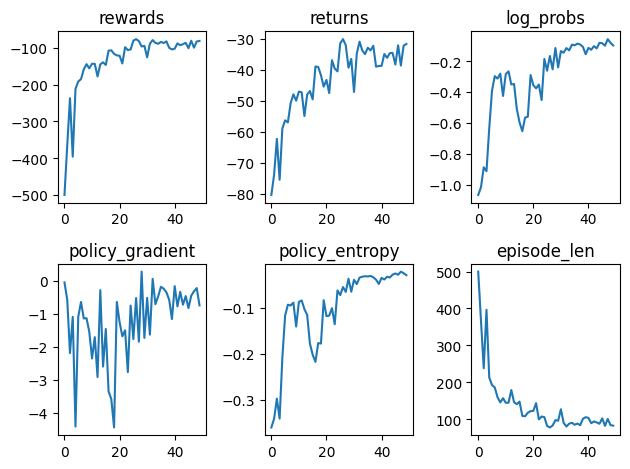

In [4]:
plot_training_results(agent.batch_results)

### CartPole

In [5]:
ENV_NAME = 'CartPole-v1'
env = gym.make(ENV_NAME)

policy = DiscretePolicy(
    env.observation_space.shape[0], 
    env.action_space.n, 
    2*(env.action_space.n+env.observation_space.shape[0])
)
agent = ReinforceAgent(policy, policy_lr=.03, optimiser=optim.Adam)

agent.train(env, num_iters=50, batch_size=10)

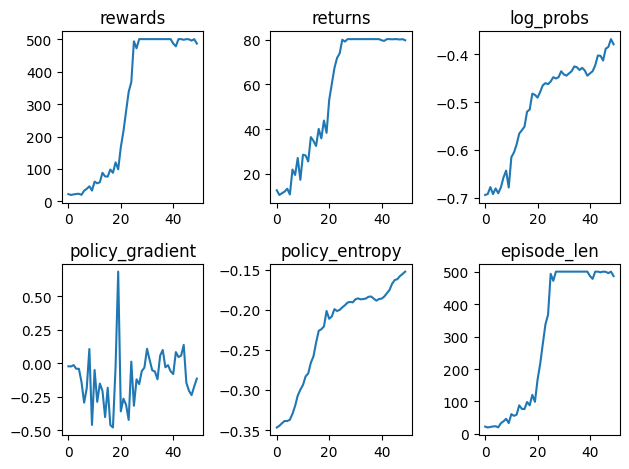

In [6]:
plot_training_results(agent.batch_results)

In [32]:
rewards = eval_agent(agent, env, 10)
print(rewards)

{0: 444.0, 1: 156.0, 2: 356.0, 3: 256.0, 4: 364.0, 5: 500.0, 6: 423.0, 7: 500.0, 8: 363.0, 9: 423.0}


### Mountain Car

In [7]:
ENV_NAME = 'MountainCar-v0'
env = gym.make(ENV_NAME)

policy = DiscretePolicy(
    env.observation_space.shape[0], 
    env.action_space.n, 
    1*(env.action_space.n+env.observation_space.shape[0])
)
agent = ReinforceAgent(policy, policy_lr=.03, optimiser=optim.Adam)

agent.train(env, num_iters=50, batch_size=10)

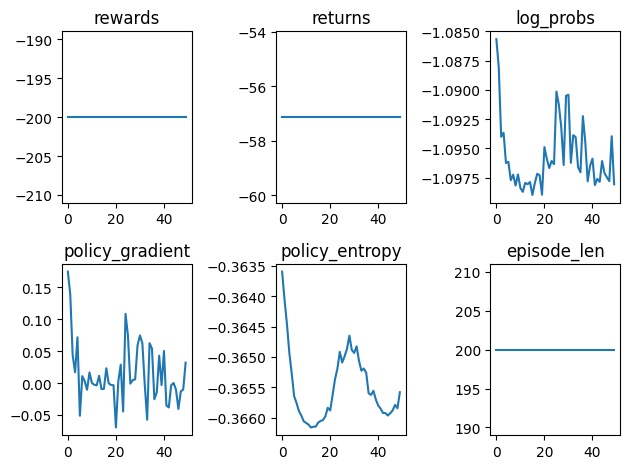

In [8]:
plot_training_results(agent.batch_results)

In [35]:
rewards = eval_agent(agent, env, 10)
print(rewards)

{0: -200.0, 1: -200.0, 2: -200.0, 3: -200.0, 4: -200.0, 5: -200.0, 6: -200.0, 7: -200.0, 8: -200.0, 9: -200.0}


### Mountain Car Continuous

In [9]:
ENV_NAME = 'MountainCarContinuous-v0'
env = gym.make(ENV_NAME)

policy = ContinuousPolicy(
    env.observation_space.shape[0], 
    env.action_space.shape[0], 
    2*(env.action_space.shape[0]+env.observation_space.shape[0])
)
agent = ReinforceAgent(policy, policy_lr=.03, optimiser=optim.Adam)

agent.train(env, num_iters=50, batch_size=10)

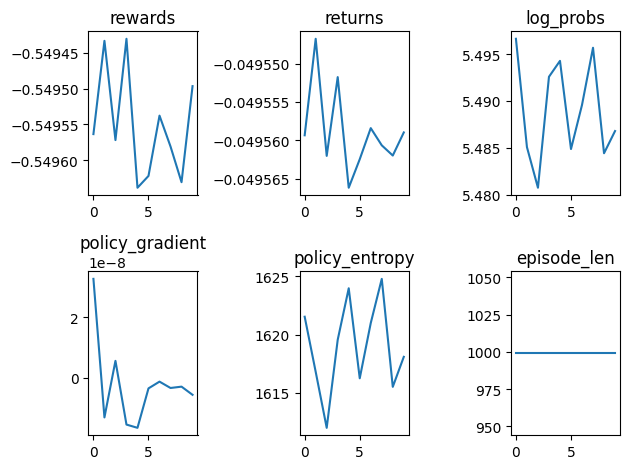

In [14]:
plot_training_results(agent.batch_results)

### Pendulum

In [10]:
ENV_NAME = 'Pendulum-v1'
env = gym.make(ENV_NAME)

policy = ContinuousPolicy(
    env.observation_space.shape[0], 
    env.action_space.shape[0], 
    2*(env.action_space.shape[0]+env.observation_space.shape[0])
)

agent = ReinforceAgent(policy, policy_lr=.03, optimiser=optim.Adam)
agent.train(env, num_iters=50, batch_size=10)

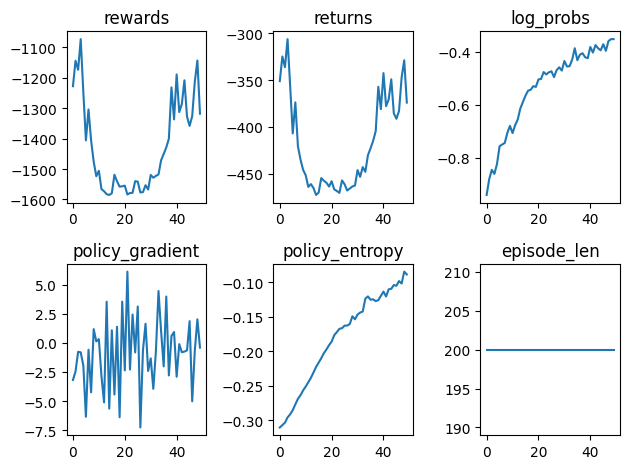

In [11]:
plot_training_results(agent.batch_results)